# Laborator 2

In [1]:
import pandas as pd
file_path = "C:/Users/Personal PC/Videos/an2 sem1/probabilitati si statistica/pythonProject/surveyDataSience.csv"
df = pd.read_csv(file_path, skiprows=1, low_memory = False)
print(df)

       Duration (in seconds) What is your age (# years)?  \
0                        910                       50-54   
1                        784                       50-54   
2                        924                       22-24   
3                        575                       45-49   
4                        781                       45-49   
...                      ...                         ...   
25968                   1756                       30-34   
25969                    253                       22-24   
25970                    494                       50-54   
25971                    277                       45-49   
25972                    255                       18-21   

      What is your gender? - Selected Choice  \
0                                        Man   
1                                        Man   
2                                        Man   
3                                        Man   
4                                      

In [2]:
numar_respond = df.shape[0]
print(numar_respond)

25973


# Numarul si tipul informatiilor

In [3]:
numar_atribute = df.shape[1]
tip_atribute = df.dtypes
print(numar_atribute)
print(tip_atribute)

369
Duration (in seconds)                                                                                                                                                                 int64
What is your age (# years)?                                                                                                                                                          object
What is your gender? - Selected Choice                                                                                                                                               object
In which country do you currently reside?                                                                                                                                            object
What is the highest level of formal education that you have attained or plan to attain within the next 2 years?                                                                      object
                                                        

# Numar de respondenti cu date complete

In [4]:
num_complete_respondents_7 = df.iloc[:, :7].dropna().shape[0]
print(f"Numar de respondenti cu date complete (primele 7 coloane): {num_complete_respondents_7}")

Numar de respondenti cu date complete (primele 7 coloane): 25973


# mapare

In [5]:
def map_education_to_years(education):
    mapping = {
        "Bachelor’s degree": 3,
        "Master’s degree": 5,
        "Doctoral degree": 8,
    }
    return mapping.get(education, np.nan)


# Aplic maparea

In [6]:
import numpy as np
education_col = df.columns[4] 
if education_col:
    df["Education Years"] = df[education_col].apply(map_education_to_years)
else:
    raise KeyError("Coloana pentru educație nu a fost găsită.")

def compute_average_years(df, country=None, gender=None):
    filtered_df = df.dropna(subset=["Education Years"])
    if country:
        filtered_df = filtered_df[filtered_df.iloc[:, 3] == country]
    if gender:
        filtered_df = filtered_df[filtered_df.iloc[:, 2] == gender]
    return filtered_df["Education Years"].mean()

# Duratele medii ale anilor de studii

In [7]:
global_avg_years = compute_average_years(df)
romania_avg_years = compute_average_years(df, country="Romania")
romania_women_avg_years = compute_average_years(df, country="Romania", gender="Woman")
print(global_avg_years)
print(romania_avg_years)
print(romania_women_avg_years)

4.4994744678987475
5.08
5.428571428571429


# Numarul de respondenti femei din Romania pentru care se detin date complete

In [8]:
femei_romania = df[(df.iloc[:, 2] == "Woman") & (df.iloc[:,3] == "Romania")]
date_complete_femei_romania = femei_romania.iloc[:, :7].dropna().shape[0]
print(date_complete_femei_romania)

16


# Numarul de femei din Romania care programeaza in Python, intervalul de varsta, C++

In [9]:
nr_femei = df[(df.iloc[:,3] == "Romania") & (df.iloc[:, 2] == "Woman") & (df.iloc[:, 7] == "Python")].shape[0]
print("Numarul femei din Romania Python: ", nr_femei)
nr_femei_c = df[(df.iloc[:,3] == "Romania") & (df.iloc[:, 2] == "Woman") & (df.iloc[:,11] == "C++")].shape[0]
print("Numarul femei din Romania C++: ", nr_femei_c)

df_femei_python = df[(df.iloc[:, 2] == "Woman") & (df.iloc[:, 7] == "Python")]
distributie_varsta_python = df_femei_python.iloc[:, 1].value_counts()
cea_mai_comuna_grupa_varsta_Python = distributie_varsta_python.idxmax()

print("Intervalul de varste cu cele mai multe femei Python: ", cea_mai_comuna_grupa_varsta_Python)

df_femei_c = df[(df.iloc[:, 2] == "Woman") &(df.iloc[:,11] == "C++")]
distributie_varsta_c = df_femei_c.iloc[:, 1].value_counts()
cea_mai_comuna_grupa_varsta_C = distributie_varsta_c.idxmax()
print("Intervalul de varste cu cele mai multe femei C++: ", cea_mai_comuna_grupa_varsta_C)


Numarul femei din Romania Python:  12
Numarul femei din Romania C++:  4
Intervalul de varste cu cele mai multe femei Python:  18-21
Intervalul de varste cu cele mai multe femei C++:  18-21


# domeniul de valori posibile si valorile extreme pentru fiecare atribut/proprietate (feature). In cazul proprietatilor nenumerice, cate valori posibile are fiecare astfel de proprietate

In [10]:
for col in df.columns:
    distributie = df[col].value_counts()
    print(distributie)
    print("Nr valori posibile: ", distributie.count())

Duration (in seconds)
484       44
394       42
423       41
509       41
481       41
          ..
40250      1
129331     1
28196      1
8904       1
14417      1
Name: count, Length: 4421, dtype: int64
Nr valori posibile:  4421
What is your age (# years)?
25-29    4931
18-21    4901
22-24    4694
30-34    3441
35-39    2504
40-44    1890
45-49    1375
50-54     964
55-59     592
60-69     553
70+       128
Name: count, dtype: int64
Nr valori posibile:  11
What is your gender? - Selected Choice
Man                        20598
Woman                       4890
Prefer not to say            355
Nonbinary                     88
Prefer to self-describe       42
Name: count, dtype: int64
Nr valori posibile:  5
In which country do you currently reside?
India                       7434
United States of America    2650
Other                       1270
Japan                        921
China                        814
                            ... 
Norway                        45
Kazakhstan 

# transformati informatiile despre vechimea in programare in numar de ani (folositi in locul intervalului, mijlocul acestuia) si apoi calculati momentele de ordin 1 si 2 pentru aceasta variabila (minim, maxim, media, deviatia standard, mediana). Ce se poate spune despre aceasta variabila?

In [11]:
import re

df_vechime = df.drop(0)
print(df_vechime)

def get_valoare_medie(val):
    numere = re.findall(r'\d+', str(val))
    numere = [int(n) for n in numere]
    
    if len(numere) == 1:
        return numere[0]
    elif len(numere) == 2:
        return sum(numere)/2
    return 0

df_vechime.iloc[:, 6]  = df_vechime.iloc[:, 6].apply(get_valoare_medie)
print("Vechimi: \n", df_vechime.iloc[:, 6])
print("Minim: \n", df_vechime.iloc[:, 6].min())
print("Maxim: \n", df_vechime.iloc[:, 6].max())
print("Media: \n", df_vechime.iloc[:, 6].mean())
print("Deviatia standard: \n", df_vechime.iloc[:, 6].std())
print("Mediana: \n", df_vechime.iloc[:, 6].median())

       Duration (in seconds) What is your age (# years)?  \
1                        784                       50-54   
2                        924                       22-24   
3                        575                       45-49   
4                        781                       45-49   
5                       1020                       25-29   
...                      ...                         ...   
25968                   1756                       30-34   
25969                    253                       22-24   
25970                    494                       50-54   
25971                    277                       45-49   
25972                    255                       18-21   

      What is your gender? - Selected Choice  \
1                                        Man   
2                                        Man   
3                                        Man   
4                                        Man   
5                                      

# distributia respondentilor care programeaza in Python pe categorii de varsta

In [12]:
distributie_varsta_python = df[(df.iloc[:, 7] == "Python")].iloc[:, 1].value_counts()
print(distributie_varsta_python)

What is your age (# years)?
18-21    4420
25-29    4283
22-24    4204
30-34    2805
35-39    1978
40-44    1486
45-49    1054
50-54     714
55-59     434
60-69     400
70+        82
Name: count, dtype: int64


# distributia respondentilor din Romania care programeaza in Python pe categorii de varsta

In [13]:
distributie_varsta_python_romania = df[(df.iloc[:,7] == "Python") & (df.iloc[:,3] == "Romania")].iloc[:,1].value_counts()
print(distributie_varsta_python_romania)

What is your age (# years)?
22-24    11
40-44     8
35-39     8
25-29     7
30-34     6
50-54     4
45-49     4
18-21     3
Name: count, dtype: int64


# distributia respondentilor femei din Romania care programeaza in Python pe categorii de varsta

In [14]:
distributie_varsta_python_romania_femei = df[(df.iloc[:, 7] == "Python") & (df.iloc[:,3] == "Romania") & (df.iloc[:, 2] == "Woman")].iloc[:, 1].value_counts()
print(distributie_varsta_python_romania_femei)

What is your age (# years)?
35-39    5
22-24    3
25-29    2
18-21    1
40-44    1
Name: count, dtype: int64


# respondentii care pot fi considerati "outlieri" din punct de vedere al vechimii in programare (puteti folositi un boxplot pentru a identifica aceste valori)

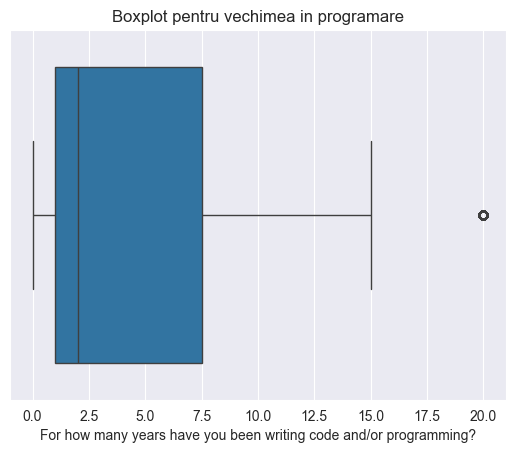

1        20.0
3        20.0
16       20.0
23       20.0
69       20.0
         ... 
25862    20.0
25887    20.0
25910    20.0
25924    20.0
25963    20.0
Name: For how many years have you been writing code and/or programming?, Length: 1860, dtype: object


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Crearea unui boxplot
sns.boxplot(x = df_vechime.iloc[:, 6])

#Afisarea graficului
plt.title('Boxplot pentru vechimea in programare')
plt.show()

#Calcularea IQR-ului pentru identificarea outlierilor
Q1 = df_vechime.iloc[:, 6].quantile(0.25)
Q3 = df_vechime.iloc[:, 6].quantile(0.75)
IQR = Q3 - Q1

#Definirea limitelor pentru outlieri
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Identificarea outlierilor
outlieri_lower = df_vechime[df_vechime.iloc[:, 6] < lower_bound]
outlieri_upper = df_vechime[df_vechime.iloc[:, 6] > upper_bound]

#Concatenarea celor doua DataFrame-uri
outlieri = pd.concat([outlieri_lower, outlieri_upper])

print(outlieri.iloc[:, 6])


# NORMALIZARE

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Exemplu de date
data = {
    'Ani de studii': [3, 5, 8],
    'Vechime în programare': [0, 10, 20]
}

df = pd.DataFrame(data)

# Inițializarea scaler-ului
scaler = MinMaxScaler()

# Normalizarea datelor
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_normalized)


   Ani de studii  Vechime în programare
0            0.0                    0.0
1            0.4                    0.5
2            1.0                    1.0
